In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
from extinctions import *
from preprocessing import *
from plotting_parameters import *
set_plotting_style("latex")

In [2]:
bands_range = [520,900]
band_centers = np.arange(bands_range[0], bands_range[1]+1)

extinction_dict = get_extinctions(bands_range)
cyt_c_ox = extinction_dict["cyt_c_ox"]
cyt_c_red = extinction_dict["cyt_c_red"]
cyt_b_ox = extinction_dict["cyt_b_ox"]
cyt_b_red = extinction_dict["cyt_b_red"]
cyt_oxi_ox = extinction_dict["cyt_oxi_ox"]
cyt_oxi_red = extinction_dict["cyt_oxi_red"]
hb = extinction_dict["hb"]
hbo2 = extinction_dict["hbo2"]
water = extinction_dict["water"]
fat = extinction_dict["fat"]
scatter_simple = (band_centers/500)**(-1.3)

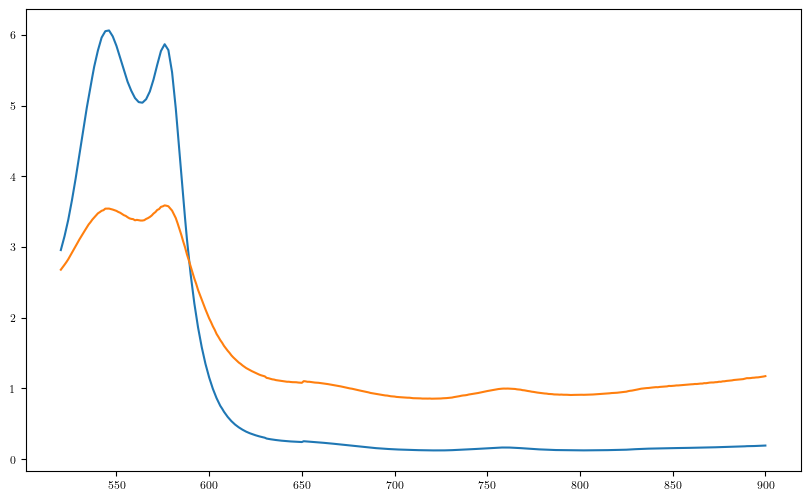

In [3]:
mu_a = 0.8*water + 0.1*fat + (25*hb + 25*hbo2 + 1*cyt_c_ox + 1*cyt_c_red + 1*cyt_b_ox + 1*cyt_b_red + 1*cyt_oxi_ox + 1*cyt_oxi_red)/1000
mu_s = 60*scatter_simple

R_mc = np.loadtxt("spectra_mc/R_baseline.txt")
mu_mc = -np.log(R_mc)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(band_centers, mu_a, label="LMM")
ax.plot(band_centers, mu_mc, label="Monte Carlo")

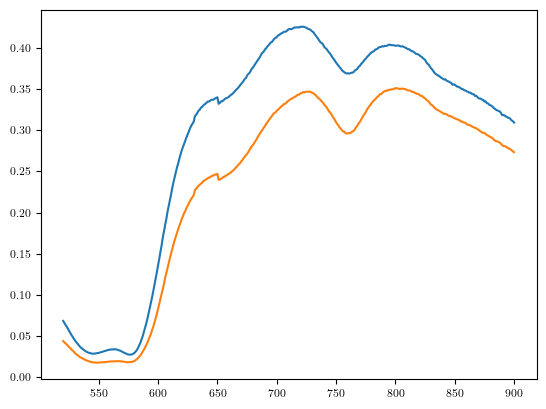

In [4]:
spectra_folder = "spectra_mc/"
hb_mc = np.loadtxt(spectra_folder + "m_hhb_50.txt")
hbo2_mc = np.loadtxt(spectra_folder + "m_hbo2_50.txt")
cyt_c_ox_mc = np.loadtxt(spectra_folder + "m_cyt_c_ox_20.txt")
cyt_c_red_mc = np.loadtxt(spectra_folder + "m_cyt_c_red_20.txt")
cyt_b_ox_mc = np.loadtxt(spectra_folder + "m_cyt_b_ox_20.txt")
cyt_b_red_mc = np.loadtxt(spectra_folder + "m_cyt_b_red_20.txt")
cyt_oxi_ox_mc = np.loadtxt(spectra_folder + "m_cyt_oxi_ox_20.txt")
cyt_oxi_red_mc = np.loadtxt(spectra_folder + "m_cyt_oxi_red_20.txt")
scatter_mc = np.loadtxt(spectra_folder + "m_scatter_40.txt")
water_mc = np.loadtxt(spectra_folder + "m_water_200.txt")
fat_mc = np.loadtxt(spectra_folder + "m_fat_200.txt")

R_cyt_b_ox_20 = np.loadtxt(spectra_folder + "R_cyt_b_ox_20.txt")
R_cyt_b_red_20 = np.loadtxt(spectra_folder + "R_cyt_b_red_20.txt")
R_cyt_c_ox_20 = np.loadtxt(spectra_folder + "R_cyt_c_ox_20.txt")
R_cyt_c_red_20 = np.loadtxt(spectra_folder + "R_cyt_c_red_20.txt")
R_cyt_oxi_ox_20 = np.loadtxt(spectra_folder + "R_cyt_oxi_ox_20.txt")
R_cyt_oxi_red_20 = np.loadtxt(spectra_folder + "R_cyt_oxi_red_20.txt")
R_hb_50 = np.loadtxt(spectra_folder + "R_hhb_50.txt")
R_hbo2_50 = np.loadtxt(spectra_folder + "R_hbo2_50.txt")
R_water_200 = np.loadtxt(spectra_folder + "R_water_200.txt")
R_fat_200 = np.loadtxt(spectra_folder + "R_fat_200.txt")


plt.plot(band_centers, R_mc, label="Baseline")
plt.plot(band_centers, R_hb_50, label="Hb")

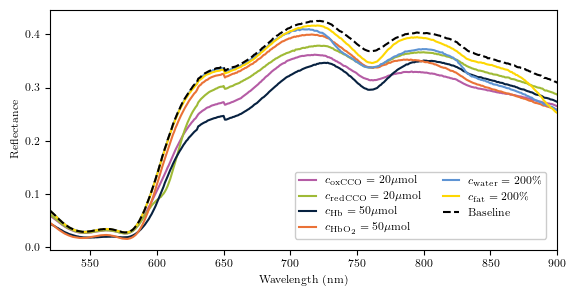

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5.8,3))

# ax.plot(band_centers, mu_cyt_b_ox_20, label="$\mu_{\mathrm{oxCytb}}=20\mathrm{\mu mol}$")
# ax.plot(band_centers, mu_cyt_b_red_20, label="$\mu_{\mathrm{redCytb}}=20\mathrm{\mu mol}$")
# ax.plot(band_centers, mu_cyt_c_ox_20, label="$\mu_{\mathrm{oxCytC}}=20\mathrm{\mu mol}$")
# ax.plot(band_centers, mu_cyt_c_red_20, label="$\mu_{\mathrm{redCytC}}=20\mathrm{\mu mol}$")"
ax.plot(band_centers, R_cyt_oxi_ox_20, label="$c_{\mathrm{oxCCO}}=20\mathrm{\mu mol}$", color=tum_pink)
ax.plot(band_centers, R_cyt_oxi_red_20, label="$c_{\mathrm{redCCO}}=20\mathrm{\mu mol}$", color=tum_green)
ax.plot(band_centers, R_hb_50, label="$c_{\mathrm{Hb}}=50\mathrm{\mu mol}$", color=tum_blue_dark)
ax.plot(band_centers, R_hbo2_50, label="$c_{\mathrm{HbO}_2}=50\mathrm{\mu mol}$", color=tum_red)
ax.plot(band_centers, R_water_200, label="$c_{\mathrm{water}}=200\%$", color=tum_blue_light)
ax.plot(band_centers, R_fat_200, label="$c_{\mathrm{fat}}=200\%$", color=tum_yellow)
ax.plot(band_centers, R_mc, label="Baseline", color='k', linestyle='--')
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance")
ax.legend(handlelength=1.5, borderaxespad=1, ncol=2, framealpha=1, )
plt.tight_layout()

fig.savefig('../../figures/mc_reflectance_comparison.svg', bbox_inches='tight', format='svg')

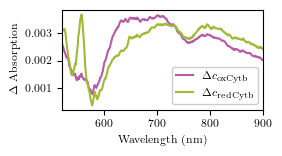

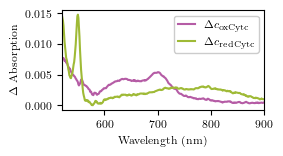

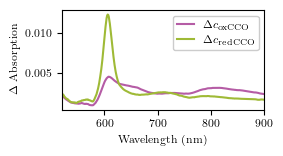

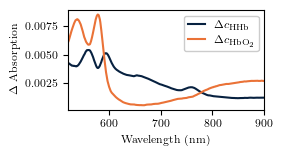

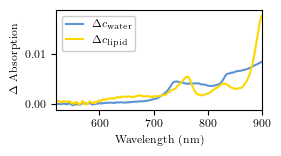

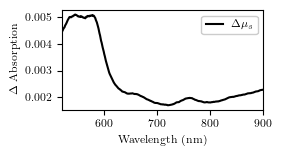

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(2.86,1.6))

ax.plot(band_centers, cyt_b_ox_mc/np.linalg.norm(cyt_b_ox_mc, ord=1), label="$\Delta c_{\mathrm{oxCytb}}$", color=tum_pink)
ax.plot(band_centers, cyt_b_red_mc/np.linalg.norm(cyt_b_red_mc, ord=1), label="$\Delta c_{\mathrm{redCytb}}$", color=tum_green)
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_cytb.svg', bbox_inches='tight', format='svg')


fig, ax = plt.subplots(1, 1, figsize=(2.87,1.6))
ax.plot(band_centers, cyt_c_ox_mc/np.linalg.norm(cyt_c_ox_mc, ord=1), label="$\Delta c_{\mathrm{oxCytc}}$", color=tum_pink)
ax.plot(band_centers, cyt_c_red_mc/np.linalg.norm(cyt_c_red_mc, ord=1), label="$\Delta c_{\mathrm{redCytc}}$", color=tum_green)
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_cytc.svg', bbox_inches='tight', format='svg')

fig, ax = plt.subplots(1, 1, figsize=(2.87,1.6))
ax.plot(band_centers, cyt_oxi_ox_mc/np.linalg.norm(cyt_oxi_ox_mc, ord=1), label="$\Delta c_{\mathrm{oxCCO}}$", color=tum_pink)
ax.plot(band_centers, cyt_oxi_red_mc/np.linalg.norm(cyt_oxi_red_mc, ord=1), label="$\Delta c_{\mathrm{redCCO}}$", color=tum_green)
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_cco.svg', bbox_inches='tight', format='svg')


fig, ax = plt.subplots(1, 1, figsize=(2.81,1.6))
ax.plot(band_centers, hb_mc/np.linalg.norm(hb_mc, ord=1), label="$\Delta c_{\mathrm{HHb}}$", color=tum_blue_dark)
ax.plot(band_centers, hbo2_mc/np.linalg.norm(hbo2_mc, ord=1), label="$\Delta c_{\mathrm{HbO}_2}$", color=tum_red)
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_hemoglobin.svg', bbox_inches='tight', format='svg')

fig, ax = plt.subplots(1, 1, figsize=(2.91,1.6))
ax.plot(band_centers, water_mc/np.linalg.norm(water_mc, ord=1), label="$\Delta c_{\mathrm{water}}$", color=tum_blue_light)
ax.plot(band_centers, fat_mc/np.linalg.norm(fat_mc, ord=1), label="$\Delta c_{\mathrm{lipid}}$", color=tum_yellow)
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_water_fat.svg', bbox_inches='tight', format='svg')


fig, ax = plt.subplots(1, 1, figsize=(2.86,1.6))
ax.plot(band_centers, scatter_mc/np.linalg.norm(scatter_mc, ord=1), label="$\Delta \mu_s$ ", color='k')
ax.legend(handlelength=1.5, borderaxespad=0.5, framealpha=1, )
ax.set_xlim(bands_range)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("$\Delta$ Absorption")
fig.tight_layout()
fig.savefig('../../figures/mc_scatter.svg', bbox_inches='tight', format='svg')